In [42]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [43]:
X = 6*np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X+2 + np.random.randn(200,1)



In [44]:
print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


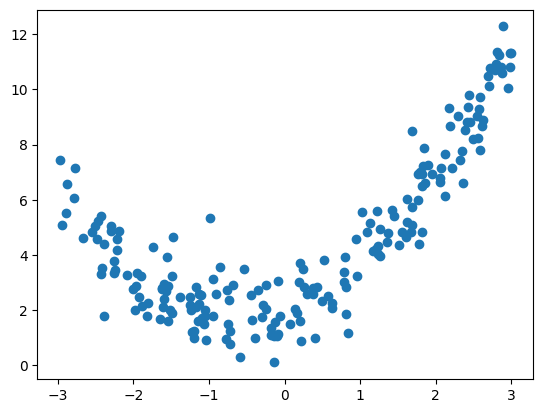

In [45]:
plt.scatter(X,y)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=2)


In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [48]:
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))

0.3106241207514432


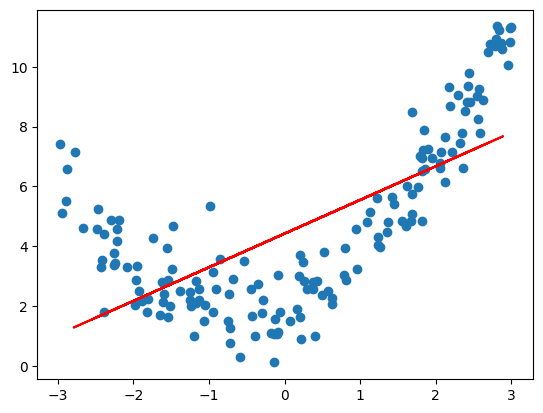

In [49]:
plt.scatter(X_train,y_train)
plt.plot(X_test, y_pred, color="red")

## Polynomial Regression

In [72]:
poly = PolynomialFeatures(degree=20)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
print(X_train_trans.shape)
print(y_train.shape)

(160, 21)
(160, 1)


R2 Score: 0.866135696652778


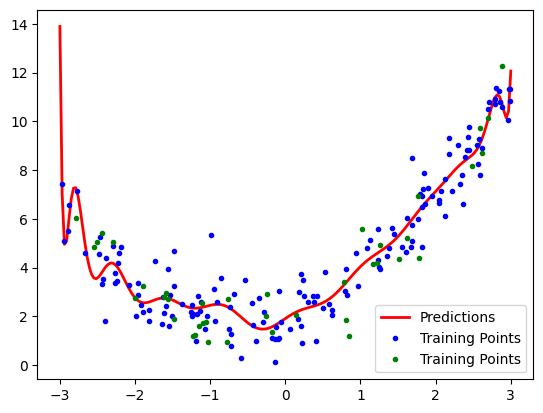

In [73]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

# Predict on the test set instead of the training set
y_pred = lr.predict(X_test_trans)

# Now compute the R2 score using y_test and y_pred
print("R2 Score:", r2_score(y_test, y_pred))

# Plot the results
x_new = np.linspace(-3,3 ,200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", label="Training Points")
plt.plot(X_test, y_test, "g.", label="Training Points")

plt.legend()
plt.show()